# Step->1.Get the data
# Step->2.Data PreProcessing
# Step->3.Data Analysis
# Step->4.Train Test Split
# Step->5.Apply the Model
# Step->6.Evaluate the Model

Importing the libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 

Data Collection and Processing

In [10]:
gold_data=pd.read_csv("D:\\datasets\\gold_price_data.csv")

In [13]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


SPX: This typically refers to the Standard & Poor's 500 Index, which is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States. The SPX column in the gold price dataset could indicate the movement or performance of the S&P 500 index and its potential impact on the price of gold. Generally, there's an inverse relationship between the stock market (represented by SPX) and the price of gold; when the stock market is performing poorly, investors often turn to gold as a safe-haven asset, driving up its price.

GLD: This likely refers to the SPDR Gold Shares, which is an exchange-traded fund (ETF) that tracks the price of gold bullion. GLD is one of the most popular gold ETFs, and its price movement is directly linked to changes in the price of gold. Therefore, the GLD column in the dataset would represent the price of this gold ETF, providing a direct indicator of gold price movements.

USO: This typically refers to the United States Oil Fund, which is an ETF that tracks the price of crude oil. While oil and gold are not directly correlated in the same way as stocks and gold, they can be influenced by similar macroeconomic factors such as inflation, geopolitical tensions, and overall market sentiment. Therefore, the USO column in the dataset could represent the price of crude oil and its potential influence on the price of gold.

SLV: This likely refers to the iShares Silver Trust, which is an ETF that tracks the price of silver bullion. Like GLD, SLV represents the price movement of a precious metal, specifically silver. While silver and gold are not identical in their price movements, they are often influenced by similar macroeconomic factors and can exhibit some degree of correlation. Therefore, the SLV column in the dataset could provide insight into the price movements of silver and its potential impact on the price of gold.

EUR/USD: This represents the exchange rate between the Euro and the US Dollar. Currency exchange rates, particularly major pairs like EUR/USD, can influence the price of gold due to their role in global trade and financial markets. A weaker US dollar relative to other currencies, such as the Euro, can make gold relatively cheaper for investors holding other currencies, potentially increasing demand and driving up the price of gold. Therefore, the EUR/USD column in the dataset could indicate the strength of the US dollar relative to the Euro and its potential impact on the price of gold.


using different features we will predict the price of Gold.

In [17]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


we have data from 2008 to 2018


In [36]:
gold_data.shape

(2290, 6)

In [22]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [26]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

we have no null values in any columns.

In [27]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


statistical info about the data.

Correlation:                                                                                                                      
    1. Positive correlation.                                                                                                             
    2. Negative correlation.                                                                                                     
    
  eg.  If Gold price increases then silver price will also increase that is positive correlation.
    

In [38]:
gold_data1 = gold_data.drop(columns=['Date'])
correlation  = gold_data1.corr()

<Axes: >

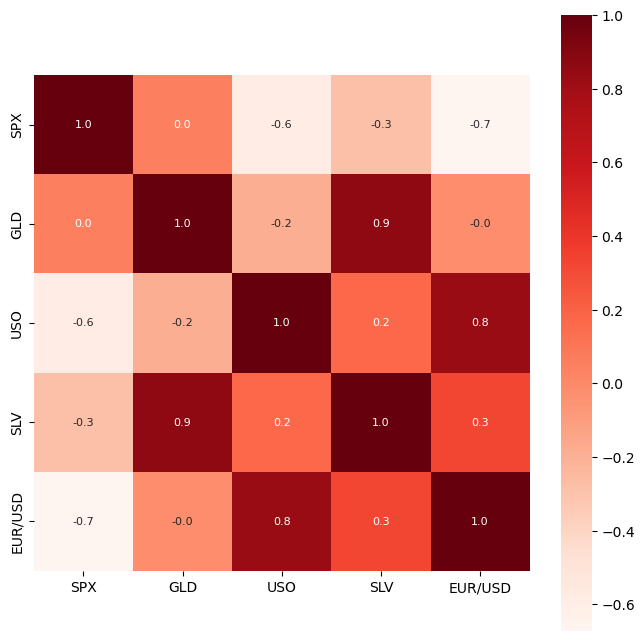

In [45]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Reds')

Observations:                                                                                                                     
1.Gold and silver are positively correlated.                                                                                           
2.spx and uso , eur/usd are negatively correlated.

In [46]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_26992\437433025.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='Green')


<Axes: xlabel='GLD', ylabel='Density'>

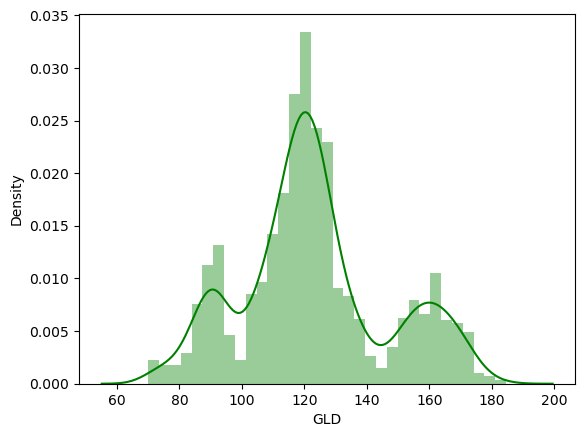

In [49]:
#checking the distribution of GLD
sns.distplot(gold_data['GLD'],color='Green')

observations:                                                                                                                   

most of price lie in the 120 range

In [51]:
X=gold_data1.drop(['GLD'],axis=1)
Y=gold_data['GLD']

In [52]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [53]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

 splitting into train and test data.

In [55]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [56]:
X_train

,SPX,USO,SLV,EUR/USD
476,1138.500000,39.790001,16.889999,1.361693
1958,2202.939941,10.630000,15.800000,1.063886
248,700.820007,24.480000,12.770000,1.256408
2231,2656.000000,11.890000,15.570000,1.225280
1325,1838.880005,33.040001,19.420000,1.366998
...,...,...,...,...
1071,1409.150024,32.320000,32.980000,1.287515
433,1132.989990,40.270000,17.230000,1.442398
674,1286.119995,38.610001,27.389999,1.357276
1099,1461.890015,33.919998,29.180000,1.306745


In [57]:
Y_train

476     109.879997
1958    115.540001
248      90.930000
2231    125.370003
1325    119.889999
           ...    
1071    169.610001
433     109.800003
674     129.869995
1099    159.429993
1608    115.139999
Name: GLD, Length: 1832, dtype: float64

In [58]:
X_test

,SPX,USO,SLV,EUR/USD
903,1351.949951,38.330002,32.900002,1.324854
129,1271.510010,93.900002,13.450000,1.472581
1787,1880.050049,8.910000,14.340000,1.119996
1913,2181.300049,10.960000,18.620001,1.127142
2048,2352.949951,10.680000,17.320000,1.067247
...,...,...,...,...
923,1370.869995,41.090000,33.220001,1.327492
1693,1952.290039,14.930000,13.990000,1.129089
2054,2349.010010,11.060000,17.430000,1.064453
658,1273.849976,37.680000,28.420000,1.315686


In [59]:
Y_test

903     168.020004
129      81.230003
1787    112.320000
1913    127.589996
2048    119.620003
           ...    
923     166.380005
1693    106.379997
2054    122.239998
658     133.830002
376     102.360001
Name: GLD, Length: 458, dtype: float64

# Model training

# we will use ensemble model of random forest regressor.

In [62]:
regressor=RandomForestRegressor(n_estimators=100)

In [65]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

# Model Evaluation

In [67]:
test_data_prediction=regressor.predict(X_test)

In [68]:
print(test_data_prediction)

[168.33459906  81.81179999 116.0618002  127.65760074 120.74910116
 154.60769746 150.4067985  126.20250037 117.41899888 126.22700031
 116.77160087 171.49740052 141.43959856 167.82749944 114.92060031
 117.50170035 138.40350296 170.28860052 159.83810283 158.99069862
 155.21610039 125.38549999 176.68739983 157.43940251 125.09530046
  93.67099993  76.67980071 120.53030032 119.05349921 167.53849957
  88.26350069 125.17329994  91.11640073 117.69909985 121.03159945
 136.25010107 115.40040116 114.89700039 146.18819975 107.10810127
 104.59960239  87.22999774 126.43820036 118.19360028 153.53159946
 119.63860005 108.45170056 107.97519829  93.26000059 127.29759745
  75.3644001  113.68089917 121.33089976 111.33569893 118.98179888
 120.70899914 158.87149973 167.81570086 147.26559689  85.79599833
  94.30720042  86.79119893  90.57710054 118.89680045 126.4725005
 127.49560033 169.80630041 122.19189937 117.60189865  98.1884001
 167.96710057 142.8532987  131.61440225 121.26690211 121.15499945
 119.5915007

R squared error

In [69]:
error_score=metrics.r2_score(Y_test,test_data_prediction)

In [70]:
print("R squared error :",error_score)

R squared error : 0.9892724188312787


lets compare the predicted and true values using graph.

In [71]:
Y_test=list(Y_test)

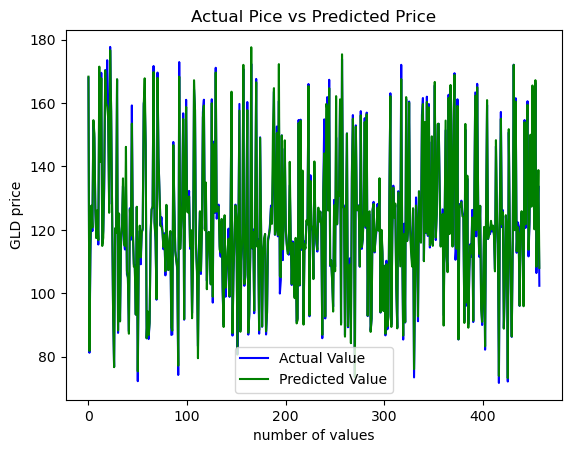

In [75]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title("Actual Pice vs Predicted Price")
plt.xlabel("number of values")
plt.ylabel("GLD price")
plt.legend()
plt.show()

In [83]:
compare_predictions_with_trueValue= list(zip(test_data_prediction, Y_test))

print(compare_predictions_with_trueValue)

[(168.33459906000004, 168.020004), (81.81179999000007, 81.230003), (116.06180019999998, 112.32), (127.65760074000003, 127.589996), (120.74910115999997, 119.620003), (154.60769745999997, 154.210007), (150.40679849999998, 148.910004), (126.20250037000001, 126.190002), (117.41899888000013, 117.470001), (126.22700031000001, 125.739998), (116.77160086999997, 115.379997), (171.49740052000007, 167.119995), (141.43959855999998, 141.630005), (167.8274994399999, 169.559998), (114.92060031000007, 115.599998), (117.50170035000005, 119.669998), (138.4035029600001, 132.949997), (170.28860052000005, 170.399994), (159.83810283000008, 159.369995), (158.99069862000005, 173.529999), (155.21610039000007, 154.720001), (125.38549998999993, 128.119995), (176.68739982999992, 177.720001), (157.43940251000012, 157.190002), (125.09530046, 125.309998), (93.6709999299999, 93.400002), (76.67980070999994, 76.790001), (120.53030031999991, 119.690002), (119.05349920999994, 118.989998), (167.5384995699999, 167.389999),